In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
print("Cateogiers in Genders:")
print(df['gender'].unique())
print("Cateogiers in Ethnicities:")
print(df['race/ethnicity'].unique())
print("Cateogiers in Parental Level of Education:")
print(df['parental level of education'].unique())
print("Cateogiers in Lunch:")
print(df['lunch'].unique())
print("Cateogiers in Test Preparation Course:")
print(df['test preparation course'].unique())

Cateogiers in Genders:
['female' 'male']
Cateogiers in Ethnicities:
['group B' 'group C' 'group A' 'group D' 'group E']
Cateogiers in Parental Level of Education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Cateogiers in Lunch:
['standard' 'free/reduced']
Cateogiers in Test Preparation Course:
['none' 'completed']


In [7]:
numerical=df.select_dtypes(include=['int64', 'float64']).columns
categorical=df.select_dtypes(include=['object']).columns
print("Numerical Columns:")
print(numerical)
print("Categorical Columns:")
print(categorical)

Numerical Columns:
Index(['math score', 'reading score', 'writing score'], dtype='object')
Categorical Columns:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [8]:
df['Total Score']=df['math score'] + df['reading score'] + df['writing score']
df['Average Score']=df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [9]:
readingfull=df[df['reading score']==100]['Average Score'].count()
mathfull=df[df['math score']==100]['Average Score'].count()

writingfull=df[df['writing score']==100]['Average Score'].count()
print("Number of students with full score in Reading:", readingfull)
print("Number of students with full score in Math:", mathfull)
print("Number of students with full score in Writing:", writingfull)

Number of students with full score in Reading: 17
Number of students with full score in Math: 7
Number of students with full score in Writing: 14


In [10]:
readingfull=df[df['reading score']<=20]['Average Score'].count()
mathfull=df[df['math score']<=20]['Average Score'].count()
writingfull=df[df['writing score']<=20]['Average Score'].count()
print("Number of students with less in Reading:", readingfull)
print("Number of students with lless score in Math:", mathfull)
print("Number of students with less score in Writing:", writingfull)

Number of students with less in Reading: 1
Number of students with lless score in Math: 4
Number of students with less score in Writing: 3


<Axes: title={'center': 'Distribution of Average Scores'}, xlabel='Average Score', ylabel='Number of Students'>

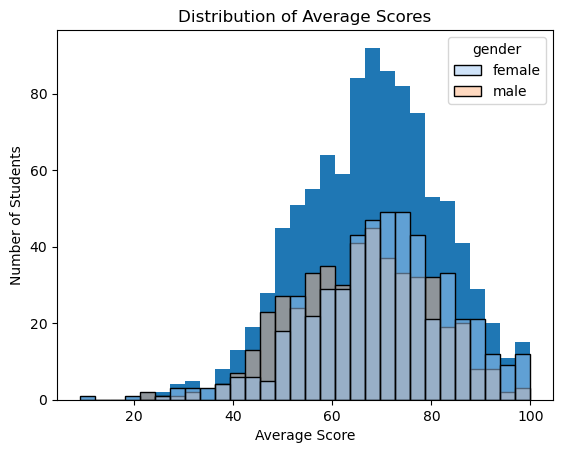

In [11]:
plt.hist(df['Average Score'],bins=30)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
sns.histplot(data=df, x='Average Score', bins=30, hue='gender', palette='pastel')

